# Explore Health and Activity data from Apple Watch

### Objective of this study is to identify the distribution patterns of Average Heart Rate, Active Energy Burned, Step Count and Walking Speed over days of month and days of week.

### The general outline of this notebook is as follows:
1. Import health data from xml files generated by apple watch
2. Explore the distribution of Average Heart Rate, Active Energy Burned, Step Count and Walking Speed over days of month and days of week.
3. Use several data visualization techniques using matplotlib and seaborn
4. Use libraries: Pandas, datetime, xml, matplotlib and seaborn

To download xml files of health and workout data, you should follow the steps below
1. Go to health app in iphone
2. Click on your profile image in the top right corner
3. Go to the bottom of the page and select, "Export All Health Data"
4. Airdrop or email the zip file into your laptop
5. unzip the file to see "export.xml" file

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd
import datetime
import ipywidgets as widgets
import plotly.graph_objects as go
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create element tree object to read xml file
tree = ET.parse('apple_health_export/export.xml') 

# Extract the attributes into columns. Create a list.
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

# create DataFrame from a list of columns
data = pd.DataFrame(record_list)

# assign appropriate type to date columns
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])
    
# check if the value is numeric.
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

# shorter observation names: use vectorized replace function
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')

### Heart Rate Data Analysis

In [79]:
# Extract Heart Rate data from main dataset
HeartRateDF = data[data.type == 'HeartRate']

#Extract a dataset for June 2022
HR_June = HeartRateDF.loc[HeartRateDF["creationDate"].between("2022-06-01", "2022-06-30")]

# aggregate the heart rate data by day
HR_byDay = HR_June.groupby(HR_June.creationDate.dt.day)['value'].mean()

HR_byDay = pd.DataFrame(HR_byDay)
HR_byDay = HR_byDay.reset_index()



Text(0.5, 1.0, 'Average Heart rate by day in June 2022')

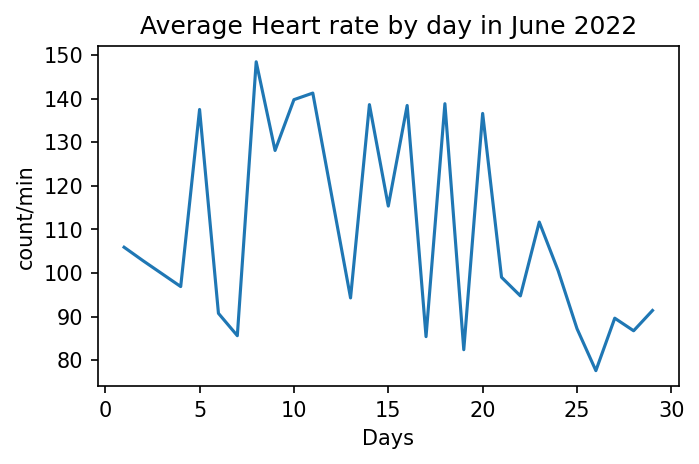

In [80]:
# set figure size
plt.rcParams['figure.figsize']=(5,3)
plt.rcParams['figure.dpi']=150

# plot average heart rate by day for month of June
plt.plot(HR_byDay.creationDate,HR_byDay.value)
plt.xlabel('Days')
plt.ylabel('count/min')
plt.title('Average Heart rate by day in June 2022')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


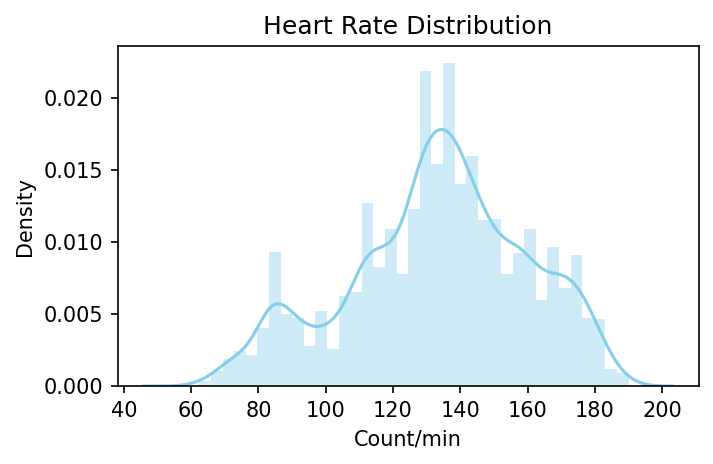

In [156]:
# plot heart rate distribution plot in June
sns.distplot(HR_June['value'], color="skyblue")
plt.title("Heart Rate Distribution")
plt.xlabel("Count/min")
plt.show()

In [82]:
# include day name column into the dataframe
HR_June["day_of_week"] = HR_June.creationDate.dt.weekday
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
HR_June["day_name"] = HR_June["day_of_week"].apply(lambda x: days[x])

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/950898849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HR_June["day_of_week"] = HR_June.creationDate.dt.weekday
/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/950898849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HR_June["day_name"] = HR_June["day_of_week"].apply(lambda x: days[x])


In [151]:
HR_June['Date'] = HR_June.creationDate.dt.strftime('%Y-%m-%d')
HR_group_byday = HR_June.groupby(['Date']).mean('value')
HR_group_byday = HR_group_byday.reset_index()
HR_group_byday

days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
HR_group_byday["day_name"] = HR_group_byday["day_of_week"].apply(lambda x: days[x])


/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/2637205542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HR_June['Date'] = HR_June.creationDate.dt.strftime('%Y-%m-%d')


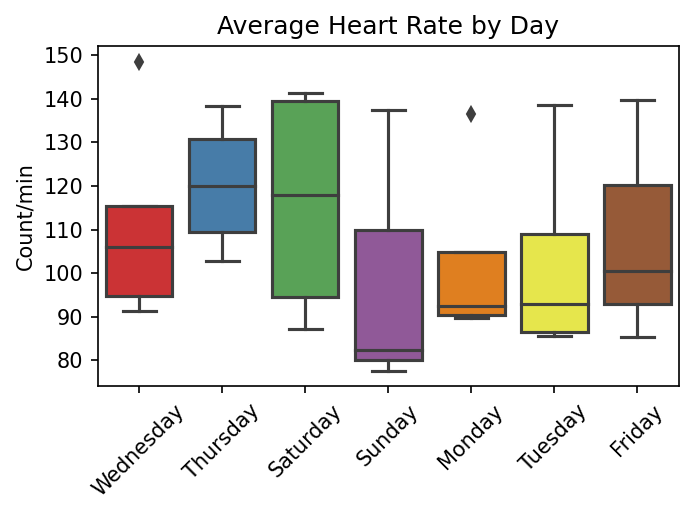

In [97]:
# create a boxplot for Average heart rate
sns.boxplot(x = 'day_name', y = 'value', data = HR_group_byday, palette = 'Set1')
plt.title('Average Heart Rate by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("Count/min")
plt.show()

### Active Energy Burned Data Analysis

In [107]:
# Extract Active Energy Burned  data from main dataset
ActiveEDF = data[data.type == 'ActiveEnergyBurned']

#Extract a dataset for June 2022
AE_June = ActiveEDF.loc[ActiveEDF["creationDate"].between("2022-06-01", "2022-06-30")]

# aggregate the Active Energy Burned data by day
AE_byDay = AE_June.groupby(AE_June.creationDate.dt.day)['value'].sum()

AE_byDay = pd.DataFrame(AE_byDay)
AE_byDay = AE_byDay.reset_index()

Text(0.5, 1.0, 'Active Energy burned by day in June 2022')

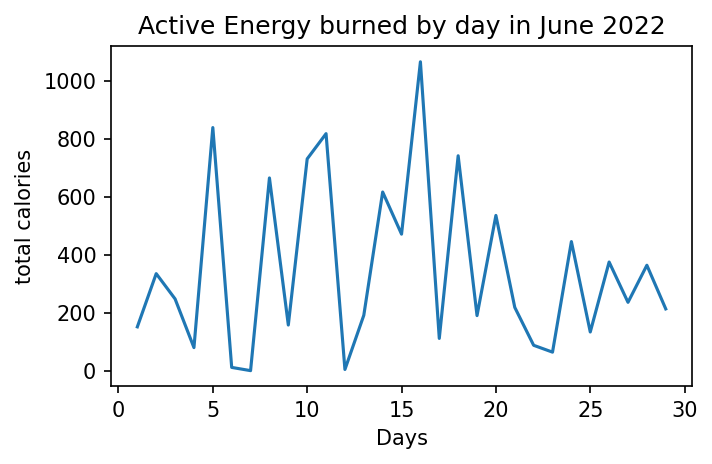

In [108]:
# set figure size
plt.rcParams['figure.figsize']=(5,3)
plt.rcParams['figure.dpi']=150

# plot active energy burned data by day for month of June
plt.plot(AE_byDay.creationDate,AE_byDay.value)
plt.xlabel('Days')
plt.ylabel('total calories')
plt.title('Active Energy burned by day in June 2022')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


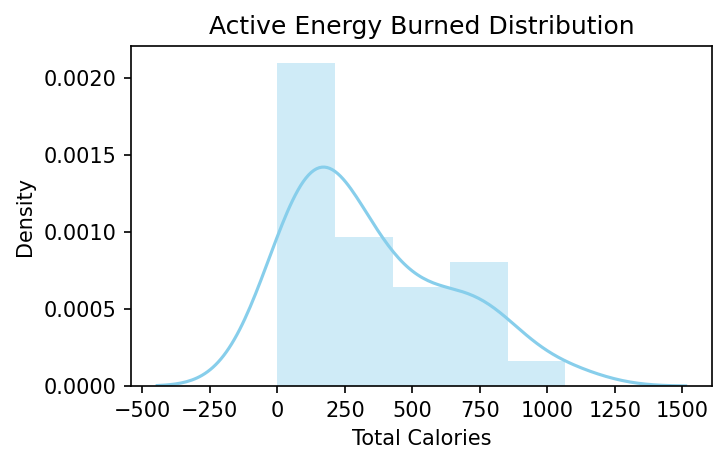

In [109]:
# plot active energy burned data distribution plot in June
sns.distplot(AE_byDay['value'], color="skyblue")
plt.title("Active Energy Burned Distribution")
plt.xlabel("Total Calories")
plt.show()

In [110]:
AE_June["day_of_week"] = AE_June.creationDate.dt.weekday
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
AE_June["day_name"] = AE_June["day_of_week"].apply(lambda x: days[x])

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/2853316143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AE_June["day_of_week"] = AE_June.creationDate.dt.weekday
/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/2853316143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AE_June["day_name"] = AE_June["day_of_week"].apply(lambda x: days[x])


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,day_of_week,day_name
361461,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-01 12:31:06-05:00,2022-06-01 12:27:47-05:00,2022-06-01 12:28:48-05:00,0.780,"<<HKDevice: 0x282fd54f0>, name:Apple Watch, ma...",2,Wednesday
361462,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-01 12:31:06-05:00,2022-06-01 12:28:48-05:00,2022-06-01 12:29:49-05:00,0.804,"<<HKDevice: 0x282fd54f0>, name:Apple Watch, ma...",2,Wednesday
361463,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-01 12:31:06-05:00,2022-06-01 12:29:49-05:00,2022-06-01 12:30:00-05:00,0.107,"<<HKDevice: 0x282fd54f0>, name:Apple Watch, ma...",2,Wednesday
361464,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-01 12:31:37-05:00,2022-06-01 12:30:41-05:00,2022-06-01 12:31:21-05:00,0.844,"<<HKDevice: 0x282fd54f0>, name:Apple Watch, ma...",2,Wednesday
361465,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-01 12:32:37-05:00,2022-06-01 12:31:21-05:00,2022-06-01 12:32:13-05:00,1.312,"<<HKDevice: 0x282fd54f0>, name:Apple Watch, ma...",2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
379815,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-29 17:28:33-05:00,2022-06-29 17:24:37-05:00,2022-06-29 17:25:38-05:00,2.329,"<<HKDevice: 0x282fbc2d0>, name:Apple Watch, ma...",2,Wednesday
379816,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-29 17:28:33-05:00,2022-06-29 17:25:38-05:00,2022-06-29 17:26:39-05:00,1.477,"<<HKDevice: 0x282fbc2d0>, name:Apple Watch, ma...",2,Wednesday
379817,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-29 17:28:33-05:00,2022-06-29 17:26:50-05:00,2022-06-29 17:27:20-05:00,0.219,"<<HKDevice: 0x282fbc2d0>, name:Apple Watch, ma...",2,Wednesday
379818,ActiveEnergyBurned,Kusal’s Apple Watch,8.6,Cal,2022-06-29 17:34:17-05:00,2022-06-29 17:28:22-05:00,2022-06-29 17:29:23-05:00,0.979,"<<HKDevice: 0x282fbc2d0>, name:Apple Watch, ma...",2,Wednesday


In [118]:
# include day name column into the dataframe
AE_June['Date'] = AE_June.creationDate.dt.strftime('%Y-%m-%d')
AE_group_byday = AE_June.groupby(['Date']).mean('value')
AE_group_byday = AE_group_byday.reset_index()

days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
AE_group_byday["day_name"] = AE_group_byday["day_of_week"].apply(lambda x: days[x])

day_df = pd.DataFrame(AE_group_byday.day_name)

AE_group_byday = AE_June.groupby(['Date']).sum('value')
AE_group_byday = AE_group_byday.reset_index()
AE_group_byday = pd.concat([AE_group_byday,day_df.day_name.rename('DayofWeek')],axis=1)

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/1898281932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AE_June['Date'] = AE_June.creationDate.dt.strftime('%Y-%m-%d')


,Date,value,day_of_week
0,2022-06-01,151.439,150
1,2022-06-02,335.125,1485
2,2022-06-03,247.892,1648
3,2022-06-04,79.784,585
4,2022-06-05,839.387,11490
5,2022-06-06,11.445,0
6,2022-06-07,0.282,5
7,2022-06-08,665.497,2918
8,2022-06-09,157.700,33
9,2022-06-10,731.228,6924


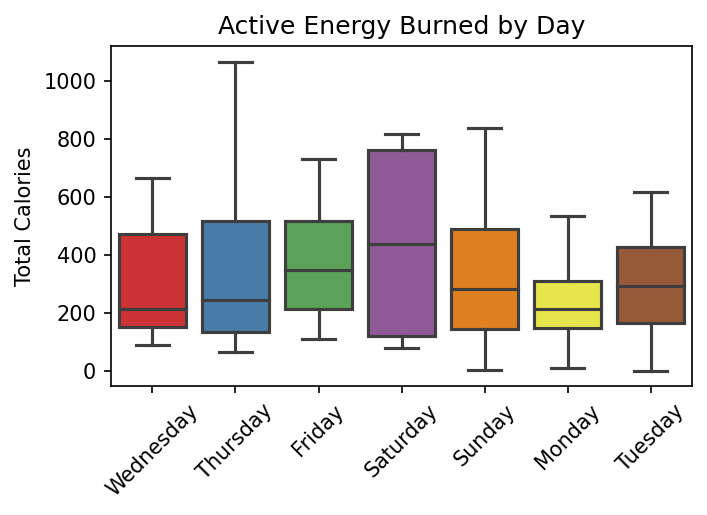

In [122]:
# create a boxplot
sns.boxplot(x = 'DayofWeek', y = 'value', data = AE_group_byday, palette = 'Set1')
plt.title('Active Energy Burned by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("Total Calories")
plt.show()

### Step Count Data Analysis

In [123]:
# Extract Step Count data from main dataset
StepC_DF = data[data.type == 'StepCount']

#Extract a dataset for June 2022
SC_June = StepC_DF.loc[StepC_DF["creationDate"].between("2022-06-01", "2022-06-30")]

# aggregate the Active Energy Burned data by day
SC_byDay = SC_June.groupby(SC_June.creationDate.dt.day)['value'].sum()

SC_byDay = pd.DataFrame(SC_byDay)
SC_byDay = SC_byDay.reset_index()


Text(0.5, 1.0, 'Step Count by day in June 2022')

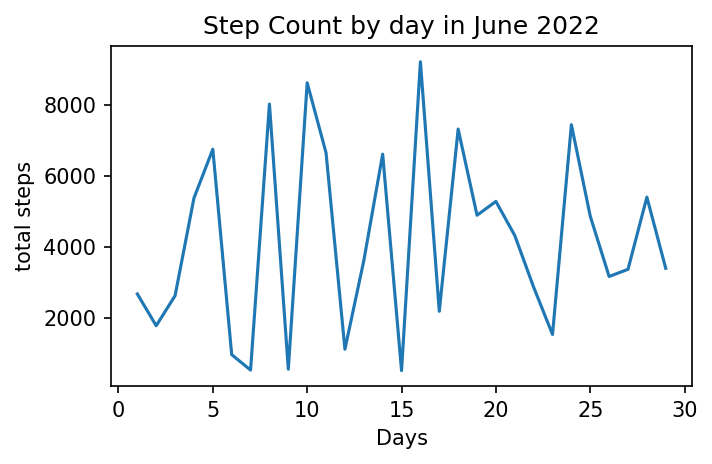

In [125]:
# set figure size
plt.rcParams['figure.figsize']=(5,3)
plt.rcParams['figure.dpi']=150

# plot active energy burned data by day for month of June
plt.plot(SC_byDay.creationDate,SC_byDay.value)
plt.xlabel('Days')
plt.ylabel('total steps')
plt.title('Step Count by day in June 2022')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


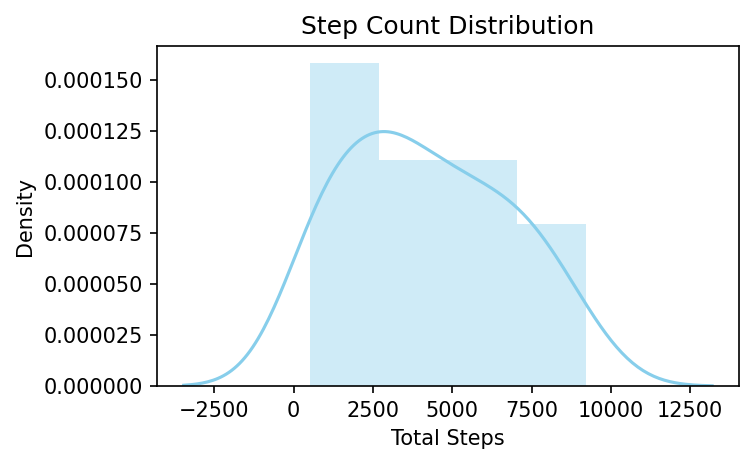

In [126]:
# plot step count distribution plot in June
sns.distplot(SC_byDay['value'], color="skyblue")
plt.title("Step Count Distribution")
plt.xlabel("Total Steps")
plt.show()

In [127]:
SC_June["day_of_week"] = SC_June.creationDate.dt.weekday
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
SC_June["day_name"] = SC_June["day_of_week"].apply(lambda x: days[x])

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/1320421564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SC_June["day_of_week"] = SC_June.creationDate.dt.weekday
/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/1320421564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SC_June["day_name"] = SC_June["day_of_week"].apply(lambda x: days[x])


,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value,device,day_of_week,day_name
99879,StepCount,Kusal’s iphone,15.5,count,2022-06-01 07:35:53-05:00,2022-06-01 07:24:50-05:00,2022-06-01 07:25:11-05:00,38.0,"<<HKDevice: 0x282f0eb70>, name:iPhone, manufac...",2,Wednesday
99880,StepCount,Kusal’s iphone,15.5,count,2022-06-01 08:15:19-05:00,2022-06-01 08:04:10-05:00,2022-06-01 08:04:15-05:00,13.0,"<<HKDevice: 0x282f0eb70>, name:iPhone, manufac...",2,Wednesday
99881,StepCount,Kusal’s iphone,15.5,count,2022-06-01 09:36:30-05:00,2022-06-01 09:22:29-05:00,2022-06-01 09:22:31-05:00,8.0,"<<HKDevice: 0x282f0eb70>, name:iPhone, manufac...",2,Wednesday
99882,StepCount,Kusal’s iphone,15.5,count,2022-06-01 10:08:41-05:00,2022-06-01 09:57:39-05:00,2022-06-01 09:57:59-05:00,29.0,"<<HKDevice: 0x282f0eb70>, name:iPhone, manufac...",2,Wednesday
99883,StepCount,Kusal’s iphone,15.5,count,2022-06-01 10:29:12-05:00,2022-06-01 10:18:09-05:00,2022-06-01 10:18:24-05:00,15.0,"<<HKDevice: 0x282f0eb70>, name:iPhone, manufac...",2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
104964,StepCount,Kusal’s iphone,15.5,count,2022-06-29 20:55:23-05:00,2022-06-29 20:44:20-05:00,2022-06-29 20:44:23-05:00,11.0,"<<HKDevice: 0x282f17110>, name:iPhone, manufac...",2,Wednesday
104973,StepCount,Kusal’s Apple Watch,8.6,count,2022-06-29 16:44:46-05:00,2022-06-29 16:32:22-05:00,2022-06-29 16:37:10-05:00,66.0,"<<HKDevice: 0x282f17200>, name:Apple Watch, ma...",2,Wednesday
104974,StepCount,Kusal’s Apple Watch,8.6,count,2022-06-29 16:54:16-05:00,2022-06-29 16:43:36-05:00,2022-06-29 16:44:48-05:00,120.0,"<<HKDevice: 0x282f17200>, name:Apple Watch, ma...",2,Wednesday
104975,StepCount,Kusal’s Apple Watch,8.6,count,2022-06-29 17:05:58-05:00,2022-06-29 16:55:32-05:00,2022-06-29 16:55:42-05:00,14.0,"<<HKDevice: 0x282f17200>, name:Apple Watch, ma...",2,Wednesday


In [135]:
SC_June['Date'] = SC_June.creationDate.dt.strftime('%Y-%m-%d')
SC_group_byday = SC_June.groupby(['Date']).mean('value')
SC_group_byday = SC_group_byday.reset_index()

days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
SC_group_byday["day_name"] = SC_group_byday["day_of_week"].apply(lambda x: days[x])

daysc_df = pd.DataFrame(SC_group_byday.day_name)

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/1586226036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SC_June['Date'] = SC_June.creationDate.dt.strftime('%Y-%m-%d')


,day_name
0,Wednesday
1,Thursday
2,Friday
3,Saturday
4,Sunday
5,Monday
6,Tuesday
7,Wednesday
8,Thursday
9,Friday


In [138]:
SC_group_byday = SC_June.groupby(['Date']).sum('value')
SC_group_byday = SC_group_byday.reset_index()

SC_group_byday = pd.concat([SC_group_byday,daysc_df.day_name.rename('DayofWeek')],axis=1)
SC_group_byday

,Date,value,day_of_week,DayofWeek
0,2022-06-01,2675.0,60,Wednesday
1,2022-06-02,1781.0,96,Thursday
2,2022-06-03,2627.0,132,Friday
3,2022-06-04,5375.0,330,Saturday
4,2022-06-05,6751.0,546,Sunday
5,2022-06-06,966.0,0,Monday
6,2022-06-07,532.0,16,Tuesday
7,2022-06-08,8024.0,1056,Wednesday
8,2022-06-09,556.0,57,Thursday
9,2022-06-10,8622.0,2412,Friday


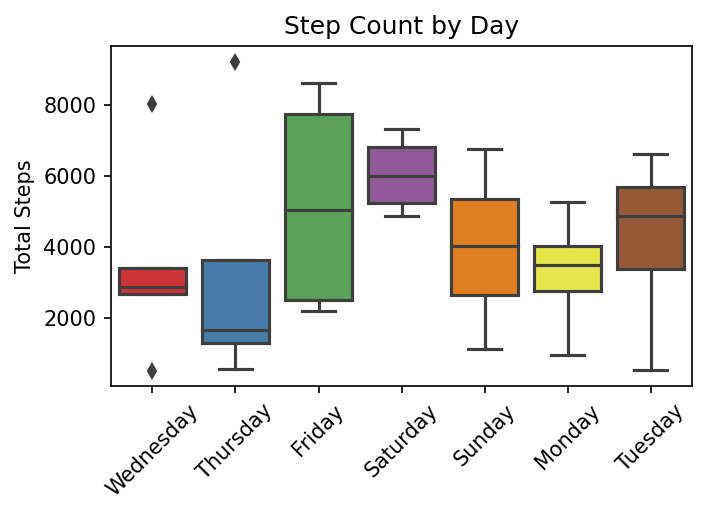

In [139]:
# create a boxplot
sns.boxplot(x = 'DayofWeek', y = 'value', data = SC_group_byday, palette = 'Set1')
plt.title('Step Count by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("Total Steps")
plt.show()

### Walking Speed Data Analysis

In [140]:
# Extract Step Count data from main dataset
WalkS_DF = data[data.type == 'WalkingSpeed']

#Extract a dataset for June 2022
WS_June = WalkS_DF.loc[WalkS_DF["creationDate"].between("2022-06-01", "2022-06-30")]

# aggregate the Active Energy Burned data by day
WS_byDay = WS_June.groupby(WS_June.creationDate.dt.day)['value'].mean()

WS_byDay = pd.DataFrame(WS_byDay)
WS_byDay = WS_byDay.reset_index()

Text(0.5, 1.0, 'Average Walking Speed by day in June 2022')

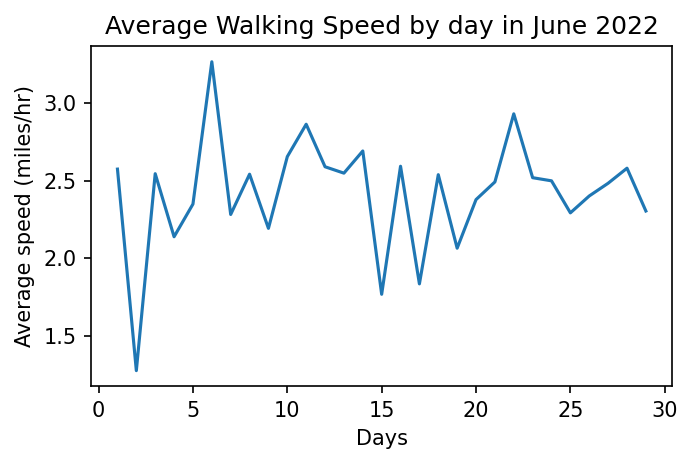

In [145]:
# set figure size

plt.rcParams['figure.figsize']=(5,3)
plt.rcParams['figure.dpi']=150

# plot walking speed by day for month of June
plt.plot(WS_byDay.creationDate,WS_byDay.value)
plt.xlabel('Days')
plt.ylabel('Average speed (miles/hr)')
plt.title('Average Walking Speed by day in June 2022')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


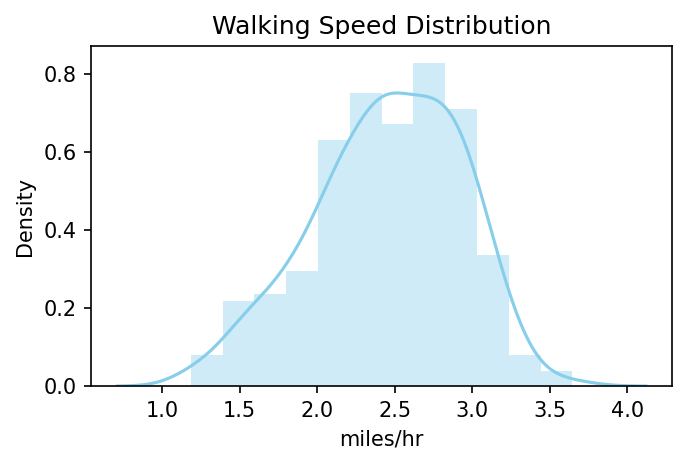

In [147]:
# plot heart rate distribution plot in June
sns.distplot(WS_June['value'], color="skyblue")
plt.title("Walking Speed Distribution")
plt.xlabel("miles/hr")
plt.show()

In [152]:
WS_June["day_of_week"] = WS_June.creationDate.dt.weekday
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
WS_June["day_name"] = WS_June["day_of_week"].apply(lambda x: days[x])

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/2337827544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_June["day_of_week"] = WS_June.creationDate.dt.weekday
/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/2337827544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_June["day_name"] = WS_June["day_of_week"].apply(lambda x: days[x])


In [154]:
WS_June['Date'] = WS_June.creationDate.dt.strftime('%Y-%m-%d')
WS_group_byday = WS_June.groupby(['Date']).mean('value')
WS_group_byday = WS_group_byday.reset_index()
WS_group_byday

#HR_June["day_of_week"] = HR_June.creationDate.dt.weekday
days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 
        5: "Saturday", 6: "Sunday"}
WS_group_byday["day_name"] = WS_group_byday["day_of_week"].apply(lambda x: days[x])

/var/folders/mj/6mxp6_t10dn0bfb9jzfv14d40000gn/T/ipykernel_53800/3489935938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WS_June['Date'] = WS_June.creationDate.dt.strftime('%Y-%m-%d')


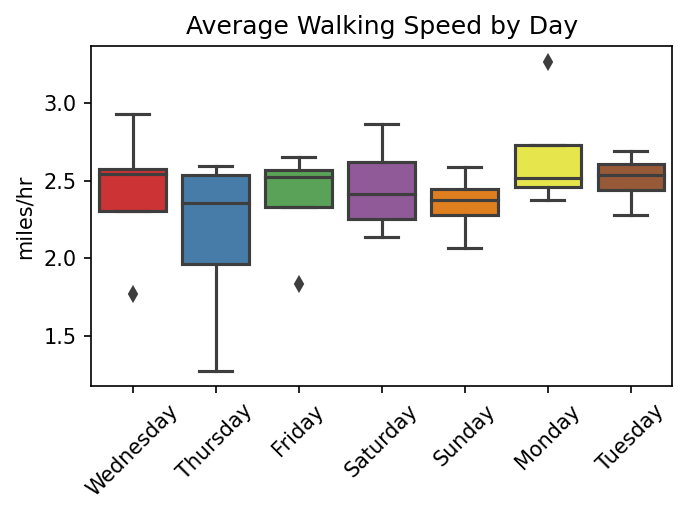

In [155]:
# create a boxplot
sns.boxplot(x = 'day_name', y = 'value', data = WS_group_byday, palette = 'Set1')
plt.title('Average Walking Speed by Day')
plt.xticks(rotation=45)
plt.xlabel("") 
plt.ylabel("miles/hr")
plt.show()